In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   User ID              Name                   Email Address  \
0        1     Ronald Murphy      williamholland@example.com   
1        2       Scott Allen             scott22@example.org   
2        3  Jonathan Parrish            brooke16@example.org   
3        4    Megan Williams         elizabeth31@example.net   
4        5     Kathryn Brown  pattersonalexandra@example.org   

             Username Date of Birth  Gender        Location  \
0      williamholland      3/6/1953    Male  Rebeccachester   
1             scott22      8/7/1978    Male   Mcphersonview   
2            brooke16     6/12/1994  Female       Youngfort   
3         elizabeth31    22/12/1964  Female    Feliciashire   
4  pattersonalexandra      4/6/1961    Male    Port Deborah   

  Membership Start Date Membership End Date Subscription Plan  \
0             15/1/2024           14/1/2025            Annual   
1              7/1/2022            6/1/2023           Monthly   
2             13/4/2022           13/4/20

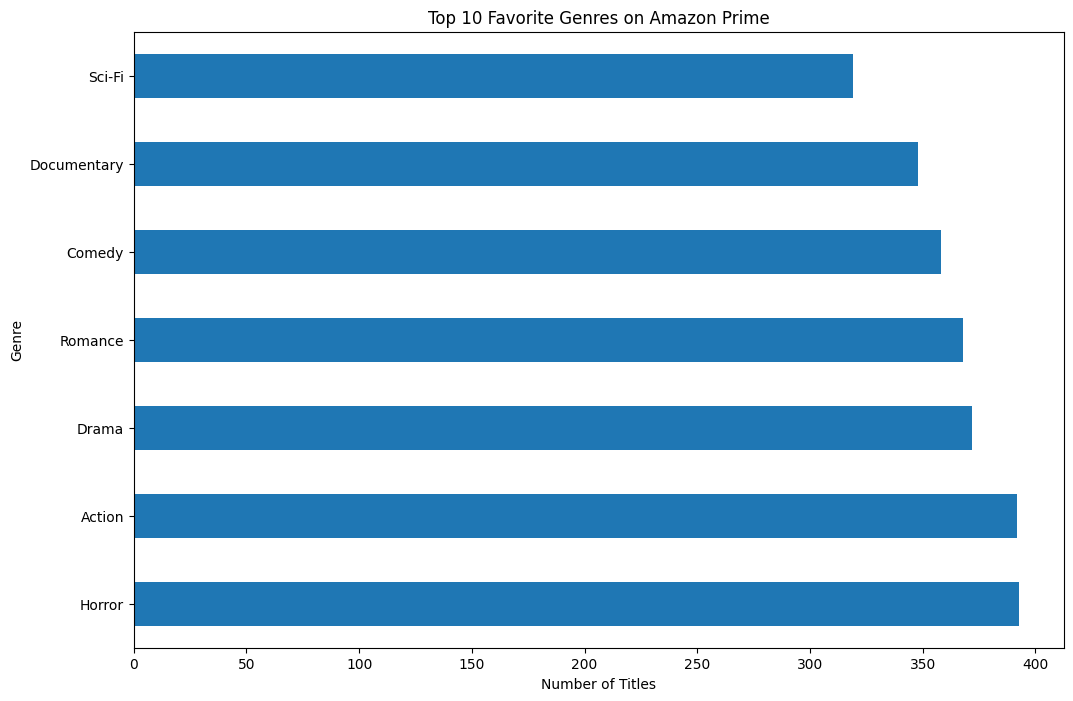

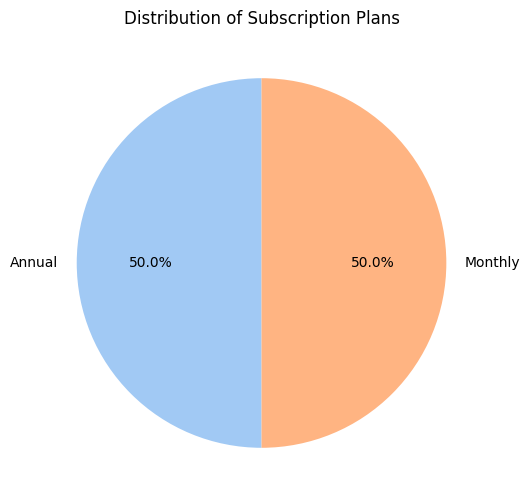

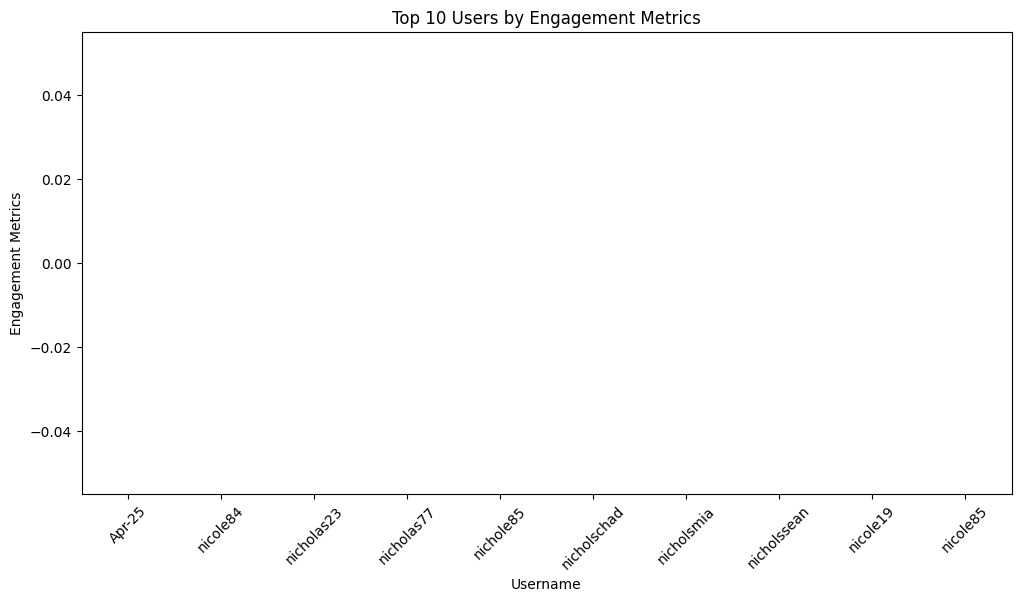

Data analysis completed successfully.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct delimiter
file_path = '/kaggle/input/amazon-prime-dataset/updated_amazon_prime_users.csv'  # Adjust the path if needed
df = pd.read_csv(file_path, delimiter=';')  # Specify semicolon as delimiter

# Display the first few rows
print(df.head())

# Display the column names to understand the dataset structure
print("Column Names:", df.columns.tolist())

# Basic Information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill missing values (if necessary)
columns_to_fill = ['Director', 'Cast', 'Country', 'Rating', 'Date Added', 'Duration']
for col in columns_to_fill:
    if col in df.columns:
        fill_value = 'Unknown' if col != 'Rating' else 'Not Rated'
        df[col].fillna(fill_value, inplace=True)

# Convert 'Date Added' to datetime
if 'Date Added' in df.columns:
    df['Date Added'] = pd.to_datetime(df['Date Added'], errors='coerce')

# Extract year from 'Date Added'
if 'Date Added' in df.columns:
    df['Year Added'] = df['Date Added'].dt.year

# Visualization: Number of titles added each year
if 'Year Added' in df.columns:
    plt.figure(figsize=(12, 6))
    df['Year Added'].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Titles Added Each Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.show()

# Genre Analysis
if 'Favorite Genres' in df.columns:
    genres = df['Favorite Genres'].str.split(',', expand=True).stack().str.strip().value_counts()

    plt.figure(figsize=(12, 8))
    genres.head(10).plot(kind='barh')
    plt.title('Top 10 Favorite Genres on Amazon Prime')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

# Type distribution (Subscription Plan)
if 'Subscription Plan' in df.columns:
    plt.figure(figsize=(6, 6))
    df['Subscription Plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Distribution of Subscription Plans')
    plt.ylabel('')
    plt.show()

# Top Users by Engagement Metrics
if 'Engagement Metrics' in df.columns:
    # Convert 'Engagement Metrics' to numeric, coercing errors to NaN and filling them with 0
    df['Engagement Metrics'] = pd.to_numeric(df['Engagement Metrics'], errors='coerce').fillna(0)

    top_users = df.groupby('Username')['Engagement Metrics'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    top_users.plot(kind='bar')
    plt.title('Top 10 Users by Engagement Metrics')
    plt.xlabel('Username')
    plt.ylabel('Engagement Metrics')
    plt.xticks(rotation=45)
    plt.show()

# Conclusion
print("Data analysis completed successfully.")


   User ID              Name                   Email Address  \
0        1     Ronald Murphy      williamholland@example.com   
1        2       Scott Allen             scott22@example.org   
2        3  Jonathan Parrish            brooke16@example.org   
3        4    Megan Williams         elizabeth31@example.net   
4        5     Kathryn Brown  pattersonalexandra@example.org   

             Username Date of Birth  Gender        Location  \
0      williamholland      3/6/1953    Male  Rebeccachester   
1             scott22      8/7/1978    Male   Mcphersonview   
2            brooke16     6/12/1994  Female       Youngfort   
3         elizabeth31    22/12/1964  Female    Feliciashire   
4  pattersonalexandra      4/6/1961    Male    Port Deborah   

  Membership Start Date Membership End Date Subscription Plan  \
0             15/1/2024           14/1/2025            Annual   
1              7/1/2022            6/1/2023           Monthly   
2             13/4/2022           13/4/20

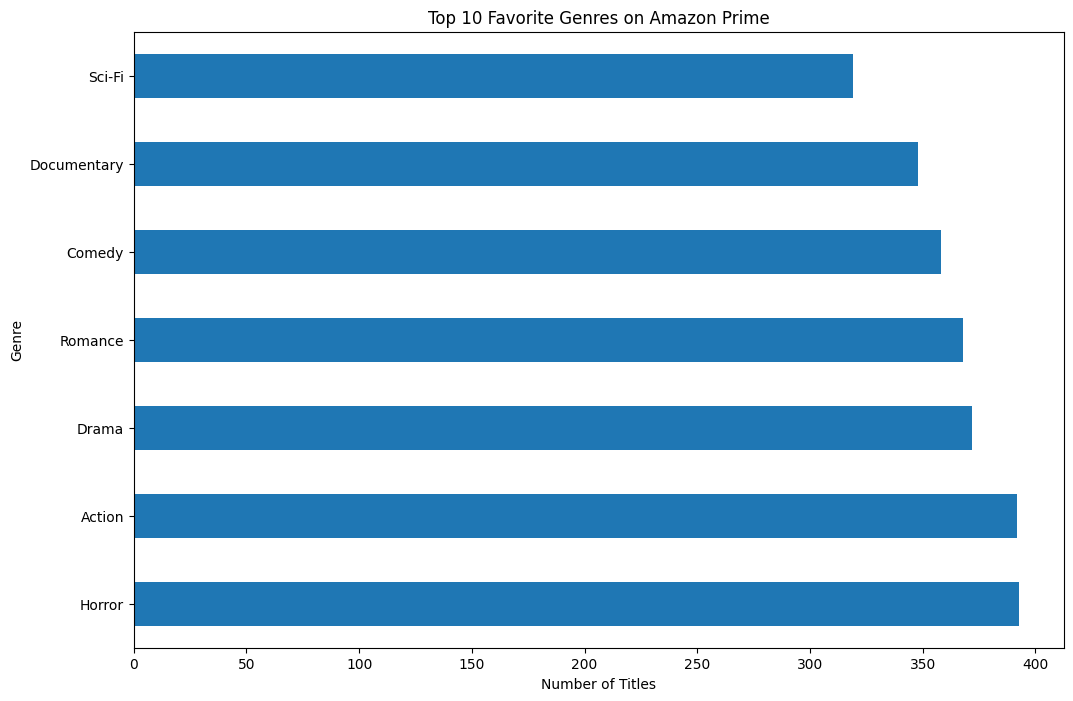

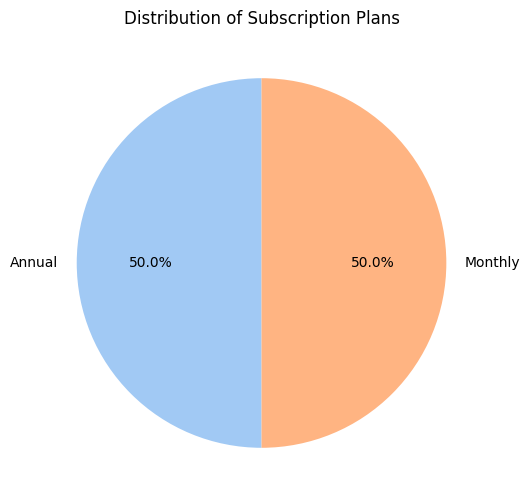

Top 10 Users by Engagement Metrics (Debug):
Username
Apr-25         0.0
nicole84       0.0
nicholas23     0.0
nicholas77     0.0
nichole85      0.0
nicholschad    0.0
nicholsmia     0.0
nicholssean    0.0
nicole19       0.0
nicole85       0.0
Name: Engagement Metrics, dtype: float64
No non-zero Engagement Metrics available to plot.


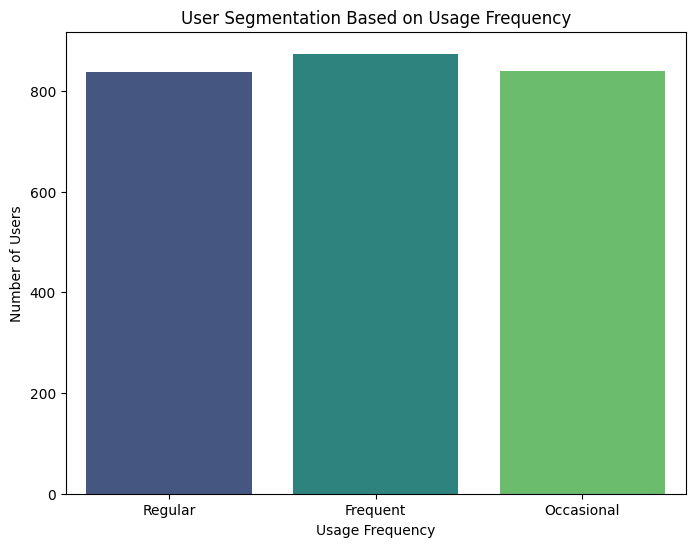

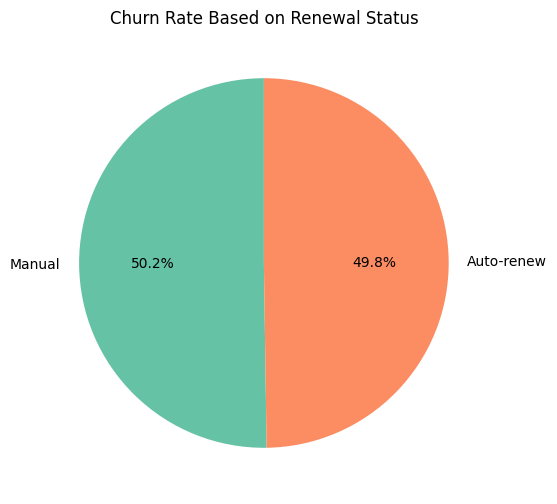

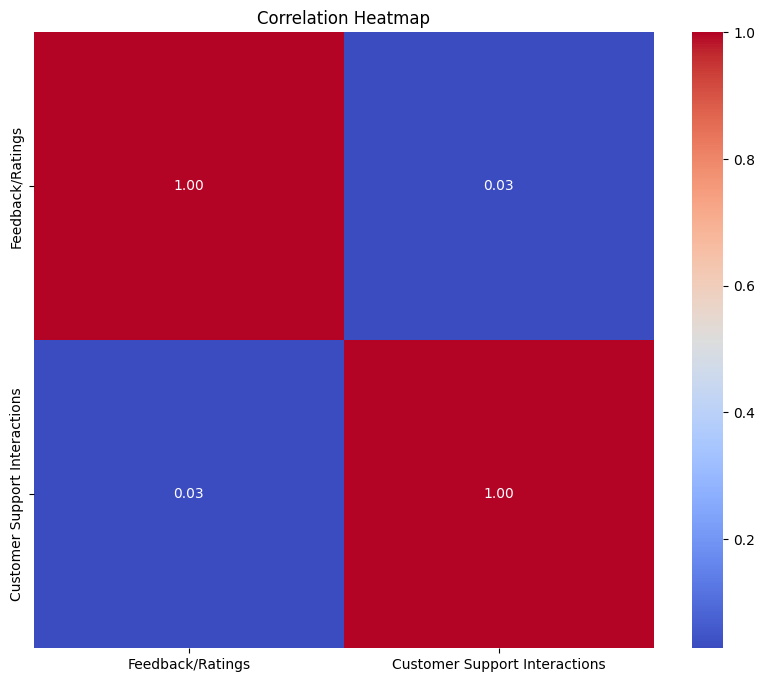

No valid LTV data available to plot.
Advanced data analysis completed successfully.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct delimiter
file_path = '/kaggle/input/amazon-prime-dataset/updated_amazon_prime_users.csv'  # Adjust the path if needed
df = pd.read_csv(file_path, delimiter=';')  # Specify semicolon as delimiter

# Display the first few rows
print(df.head())

# Display the column names to understand the dataset structure
print("Column Names:", df.columns.tolist())

# Basic Information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill missing values (if necessary)
columns_to_fill = ['Director', 'Cast', 'Country', 'Rating', 'Date Added', 'Duration']
for col in columns_to_fill:
    if col in df.columns:
        fill_value = 'Unknown' if col != 'Rating' else 'Not Rated'
        df[col] = df[col].fillna(fill_value)

# Convert 'Date Added' to datetime
if 'Date Added' in df.columns:
    df['Date Added'] = pd.to_datetime(df['Date Added'], errors='coerce')

# Extract year from 'Date Added'
if 'Date Added' in df.columns:
    df['Year Added'] = df['Date Added'].dt.year

# Visualization: Number of titles added each year
if 'Year Added' in df.columns:
    plt.figure(figsize=(12, 6))
    df['Year Added'].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Titles Added Each Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.show()

# Genre Analysis
if 'Favorite Genres' in df.columns:
    genres = df['Favorite Genres'].str.split(',', expand=True).stack().str.strip().value_counts()

    plt.figure(figsize=(12, 8))
    genres.head(10).plot(kind='barh')
    plt.title('Top 10 Favorite Genres on Amazon Prime')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

# Type distribution (Subscription Plan)
if 'Subscription Plan' in df.columns:
    plt.figure(figsize=(6, 6))
    df['Subscription Plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Distribution of Subscription Plans')
    plt.ylabel('')
    plt.show()

# Top Users by Engagement Metrics
if 'Engagement Metrics' in df.columns:
    # Convert 'Engagement Metrics' to numeric, coercing errors to NaN and filling them with 0
    df['Engagement Metrics'] = pd.to_numeric(df['Engagement Metrics'], errors='coerce').fillna(0)

    # Debugging: Display top 10 users with engagement metrics before plotting
    top_users = df.groupby('Username')['Engagement Metrics'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Users by Engagement Metrics (Debug):")
    print(top_users)

    # Plot only if there are non-zero engagement metrics
    if top_users.sum() > 0:
        plt.figure(figsize=(12, 6))
        top_users.plot(kind='bar')
        plt.title('Top 10 Users by Engagement Metrics')
        plt.xlabel('Username')
        plt.ylabel('Engagement Metrics')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No non-zero Engagement Metrics available to plot.")

# Advanced Analysis

# 1. User Segmentation
if 'Usage Frequency' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Usage Frequency', palette='viridis')
    plt.title('User Segmentation Based on Usage Frequency')
    plt.xlabel('Usage Frequency')
    plt.ylabel('Number of Users')
    plt.show()

# 2. Churn Analysis
if 'Renewal Status' in df.columns:
    churn_rate = df['Renewal Status'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 6))
    churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title('Churn Rate Based on Renewal Status')
    plt.ylabel('')
    plt.show()

# 3. Correlation Heatmap (excluding irrelevant columns)
numeric_cols = df.select_dtypes(include=[np.number]).drop(['User ID'], axis=1, errors='ignore')
numeric_cols = numeric_cols.loc[:, (numeric_cols != numeric_cols.iloc[0]).any()]  # Remove constant columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Lifetime Value (LTV) Estimation (fixing LTV calculation)
if 'Subscription Plan' in df.columns and 'Engagement Metrics' in df.columns:
    df['Engagement Metrics'] = df['Engagement Metrics'].fillna(0)
    df['LTV'] = df['Engagement Metrics'] * df['Subscription Plan'].apply(lambda x: 120 if x == 'Annual' else 10)

    # Filter out LTV values equal to zero
    ltv_data = df[df['LTV'] > 0]

    if not ltv_data.empty:
        plt.figure(figsize=(10, 6))
        ltv_data.groupby('Subscription Plan')['LTV'].mean().plot(kind='bar')
        plt.title('Estimated Lifetime Value by Subscription Plan')
        plt.xlabel('Subscription Plan')
        plt.ylabel('Estimated LTV')
        plt.show()
    else:
        print("No valid LTV data available to plot.")

# 5. Trend Analysis of Engagement Over Time
if 'Date Added' in df.columns:
    df['Month Added'] = df['Date Added'].dt.to_period('M')
    trend_data = df.groupby('Month Added')['Engagement Metrics'].mean()
    trend_data = trend_data[trend_data > 0]  # Filter out zero trends

    if not trend_data.empty:
        plt.figure(figsize=(14, 6))
        trend_data.plot()
        plt.title('Engagement Trend Over Time')
        plt.xlabel('Month')
        plt.ylabel('Average Engagement Metrics')
        plt.show()
    else:
        print("No engagement trend data available to plot.")

# Conclusion
print("Advanced data analysis completed successfully.")


   User ID              Name                   Email Address  \
0        1     Ronald Murphy      williamholland@example.com   
1        2       Scott Allen             scott22@example.org   
2        3  Jonathan Parrish            brooke16@example.org   
3        4    Megan Williams         elizabeth31@example.net   
4        5     Kathryn Brown  pattersonalexandra@example.org   

             Username Date of Birth  Gender        Location  \
0      williamholland      3/6/1953    Male  Rebeccachester   
1             scott22      8/7/1978    Male   Mcphersonview   
2            brooke16     6/12/1994  Female       Youngfort   
3         elizabeth31    22/12/1964  Female    Feliciashire   
4  pattersonalexandra      4/6/1961    Male    Port Deborah   

  Membership Start Date Membership End Date Subscription Plan  \
0             15/1/2024           14/1/2025            Annual   
1              7/1/2022            6/1/2023           Monthly   
2             13/4/2022           13/4/20

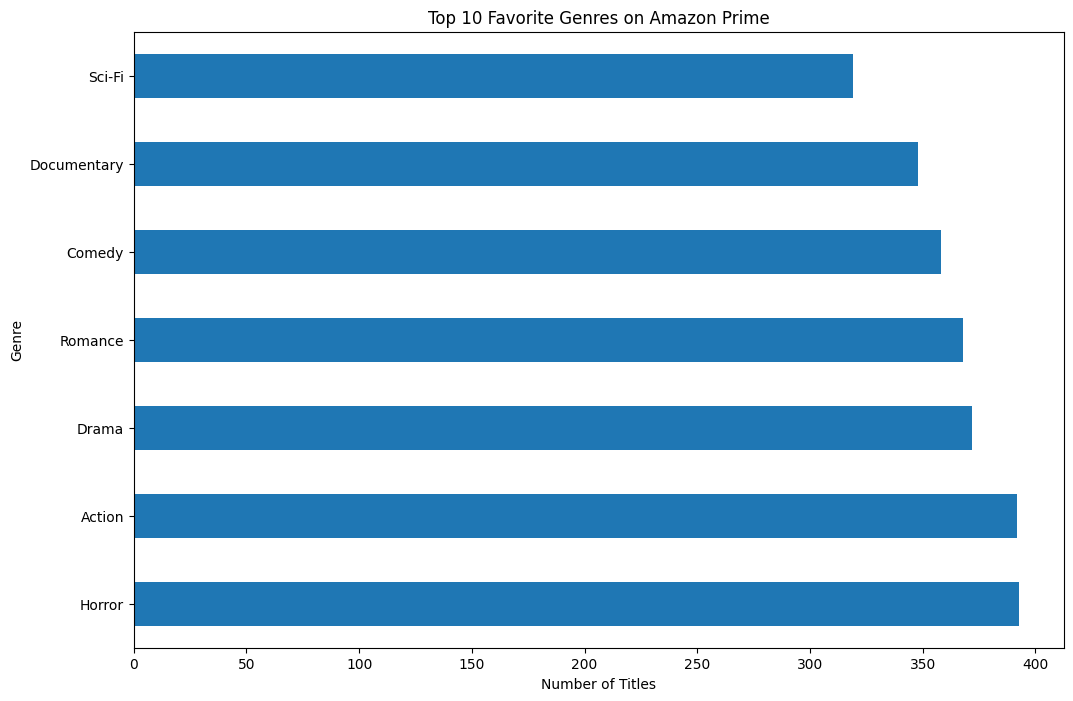

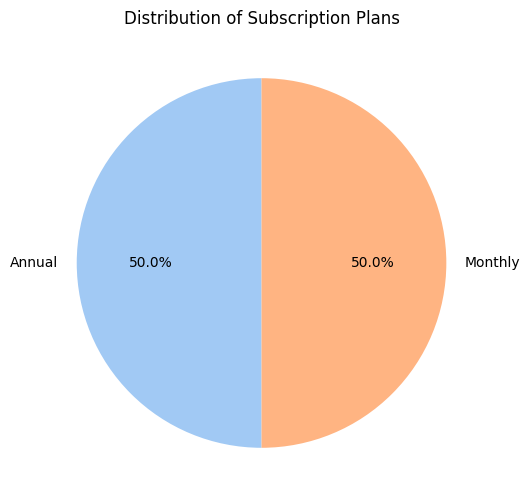

Unique Engagement Metrics Values (Post-cleaning):
[0.]
Top 10 Users by Engagement Metrics (Debug):
Username
Apr-25         0.0
nicole84       0.0
nicholas23     0.0
nicholas77     0.0
nichole85      0.0
nicholschad    0.0
nicholsmia     0.0
nicholssean    0.0
nicole19       0.0
nicole85       0.0
Name: Engagement Metrics, dtype: float64
No non-zero Engagement Metrics available to plot.


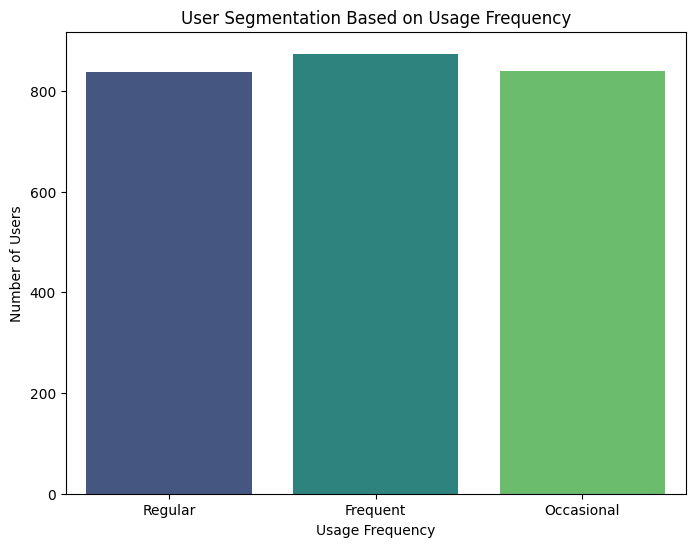

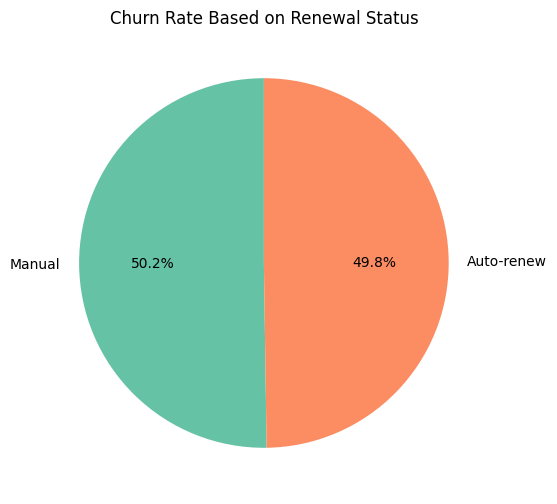

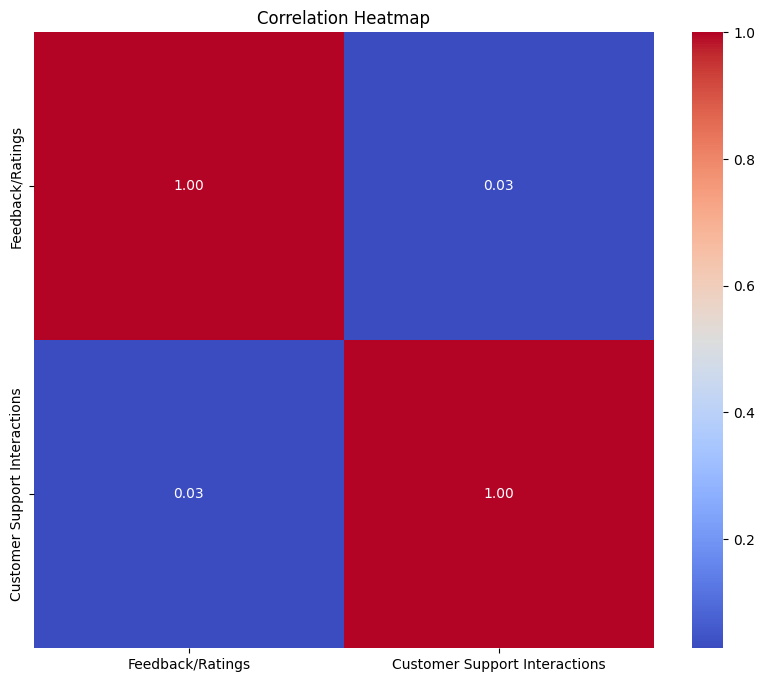

No valid LTV data available to plot.
Advanced data analysis completed successfully.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with correct delimiter
file_path = '/kaggle/input/amazon-prime-dataset/updated_amazon_prime_users.csv'  # Adjust the path if needed
df = pd.read_csv(file_path, delimiter=';')  # Specify semicolon as delimiter

# Display the first few rows
print(df.head())

# Display the column names to understand the dataset structure
print("Column Names:", df.columns.tolist())

# Basic Information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill missing values (if necessary)
columns_to_fill = ['Director', 'Cast', 'Country', 'Rating', 'Date Added', 'Duration']
for col in columns_to_fill:
    if col in df.columns:
        fill_value = 'Unknown' if col != 'Rating' else 'Not Rated'
        df[col] = df[col].fillna(fill_value)

# Convert 'Date Added' to datetime
if 'Date Added' in df.columns:
    df['Date Added'] = pd.to_datetime(df['Date Added'], errors='coerce')

# Extract year from 'Date Added'
if 'Date Added' in df.columns:
    df['Year Added'] = df['Date Added'].dt.year

# Visualization: Number of titles added each year
if 'Year Added' in df.columns:
    plt.figure(figsize=(12, 6))
    df['Year Added'].value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Titles Added Each Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.show()

# Genre Analysis
if 'Favorite Genres' in df.columns:
    genres = df['Favorite Genres'].str.split(',', expand=True).stack().str.strip().value_counts()

    plt.figure(figsize=(12, 8))
    genres.head(10).plot(kind='barh')
    plt.title('Top 10 Favorite Genres on Amazon Prime')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

# Type distribution (Subscription Plan)
if 'Subscription Plan' in df.columns:
    plt.figure(figsize=(6, 6))
    df['Subscription Plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Distribution of Subscription Plans')
    plt.ylabel('')
    plt.show()

# Clean and Convert Engagement Metrics
if 'Engagement Metrics' in df.columns:
    # Remove hidden characters, spaces, and non-numeric symbols
    df['Engagement Metrics'] = df['Engagement Metrics'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

    # Convert to numeric, handling errors
    df['Engagement Metrics'] = pd.to_numeric(df['Engagement Metrics'], errors='coerce').fillna(0)

    # Check unique values to verify
    print("Unique Engagement Metrics Values (Post-cleaning):")
    print(df['Engagement Metrics'].unique())

    # Debugging: Display top 10 users with engagement metrics before plotting
    top_users = df.groupby('Username')['Engagement Metrics'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Users by Engagement Metrics (Debug):")
    print(top_users)

    # Plot only if there are non-zero engagement metrics
    if top_users.sum() > 0:
        plt.figure(figsize=(12, 6))
        top_users.plot(kind='bar')
        plt.title('Top 10 Users by Engagement Metrics')
        plt.xlabel('Username')
        plt.ylabel('Engagement Metrics')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No non-zero Engagement Metrics available to plot.")

# Advanced Analysis

# 1. User Segmentation
if 'Usage Frequency' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Usage Frequency', palette='viridis')
    plt.title('User Segmentation Based on Usage Frequency')
    plt.xlabel('Usage Frequency')
    plt.ylabel('Number of Users')
    plt.show()

# 2. Churn Analysis
if 'Renewal Status' in df.columns:
    churn_rate = df['Renewal Status'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 6))
    churn_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title('Churn Rate Based on Renewal Status')
    plt.ylabel('')
    plt.show()

# 3. Correlation Heatmap (excluding irrelevant columns)
numeric_cols = df.select_dtypes(include=[np.number]).drop(['User ID'], axis=1, errors='ignore')
numeric_cols = numeric_cols.loc[:, (numeric_cols != numeric_cols.iloc[0]).any()]  # Remove constant columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Lifetime Value (LTV) Estimation (fixing LTV calculation)
if 'Subscription Plan' in df.columns and 'Engagement Metrics' in df.columns:
    df['Engagement Metrics'] = df['Engagement Metrics'].fillna(0)
    df['LTV'] = df['Engagement Metrics'] * df['Subscription Plan'].apply(lambda x: 120 if x == 'Annual' else 10)

    # Filter out LTV values equal to zero
    ltv_data = df[df['LTV'] > 0]

    if not ltv_data.empty:
        plt.figure(figsize=(10, 6))
        ltv_data.groupby('Subscription Plan')['LTV'].mean().plot(kind='bar')
        plt.title('Estimated Lifetime Value by Subscription Plan')
        plt.xlabel('Subscription Plan')
        plt.ylabel('Estimated LTV')
        plt.show()
    else:
        print("No valid LTV data available to plot.")

# 5. Trend Analysis of Engagement Over Time
if 'Date Added' in df.columns:
    df['Month Added'] = df['Date Added'].dt.to_period('M')
    trend_data = df.groupby('Month Added')['Engagement Metrics'].mean()
    trend_data = trend_data[trend_data > 0]  # Filter out zero trends

    if not trend_data.empty:
        plt.figure(figsize=(14, 6))
        trend_data.plot()
        plt.title('Engagement Trend Over Time')
        plt.xlabel('Month')
        plt.ylabel('Average Engagement Metrics')
        plt.show()
    else:
        print("No engagement trend data available to plot.")

# Conclusion
print("Advanced data analysis completed successfully.")
